In [1]:
import io
import json
import unicodedata
import sys
import operator
import string
import math
import re
import time
from collections import defaultdict
from collections import Counter
import pandas as pd
# from PIL import Image

# Install and import text2emotion

In [645]:
#Install package using pip
#!pip3 install text2emotion

In [599]:
import text2emotion as te

In [603]:
text = "Why are people so shady when you mention wanting to be vegan or not eating certain things?? Well you sit and eat pork butt all your life. Lol"
te.get_emotion(text)

{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.17, 'Sad': 0.0, 'Fear': 0.83}

# Fuzzyfying emotions

In [620]:
#get_labels returns the emotion power for each emotion, e.g., -  happy -  weak, angry - strong ...

def get_labels(text):
    emotions = te.get_emotion(text)
    #print(emotions)
    ret = {
    'Happy':"",
    'Angry':"",
    'Surprise':"",
    'Sad': "", 
    'Fear':""
    }
    
    ans = {
  'Strong': [0],
  'Medium': [0],
  'Weak': [0], 
         }    
    for emotion in ret.keys():
        x = emotions[emotion]
        #ignore null emotions so that they do not count as "Weak"
        if (x==0 or x==0.0): 
            ret[emotion] = 'null' 
            continue
            #a,b,c parameters of triangular membership function. Look below , there is Fuzzy Sets Construction Section
        for fuzzy_set in Happy.keys():
            a = Happy[fuzzy_set][0]
            b = Happy[fuzzy_set][1]
            c = Happy[fuzzy_set][2]
         
            if(x < a or x > c) : ans[fuzzy_set]=0.0
            if(a<=x<=b) : ans[fuzzy_set] = (x-a)/(b-a)
            if(b<=x<=c): ans[fuzzy_set] =(c-x)/(c-b)
            
        # print('emotion:' + emotion, ans) 
        ret[emotion] =(max(ans, key=ans.get)) #get key with highest value
   
    return ret;
   # print(emotions['Happy'])
   # print(Happy['Medium'][1])

# Test

In [643]:
#get_labels("Thanks for the follow! I feel so honored. I'm proud to be a member and I've been converting as many people to veganism as I can.")
#get_labels("God designed melanated people’s digestive system to be vegans and to consume life not death! Fruits and Vegetables are made from the Sun, Earth, & Water, you are powering your vessels electric current and bio field by eating electric foods")
#em = get_labels("Ditch Dairy! No reasons for humans to consume animal breast milk meant for THEIR babies! SO many alternatives that don’t involve cruelty.")
#em = get_labels("thinking about how in the future when everyone drinks plant milk, someone will tell their child that we used to drink cow milk and the kid will think we used to put a cow in a blender")
em = get_labels("Sorry Vegans, steak taste good.") 
                
print(em) 





{'Happy': 'Medium', 'Angry': 'null', 'Surprise': 'null', 'Sad': 'Weak', 'Fear': 'Weak'}


# Fuzzy Sets Construction

In [622]:
import numpy as np
from matplotlib import pyplot as plt

In [623]:
# [0, 1]
start = 0
stop = 1 + 0.001
step = 0.001
x = np.arange(start, stop, step)
print(x)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [624]:
def triangular(x, a, b, c):
    return max( min( (x-a)/(b-a), (c-x)/(c-b) ), 0 )

In [625]:
# U var represents the Universe of Discourse of numerical variable Emotion Power

U = np.arange(0,1,0.001) # generates a sequence of number between 0 and 10, step 0.2

In [610]:
#fuzzy sets for emotions power
Happy = {
  'Weak': [0, 0.001, 0.5],
  'Medium': [0, 0.5, 1],
  'Strong': [0.5, 1, 1.001],
}

Text(0, 0.5, 'Membership value')

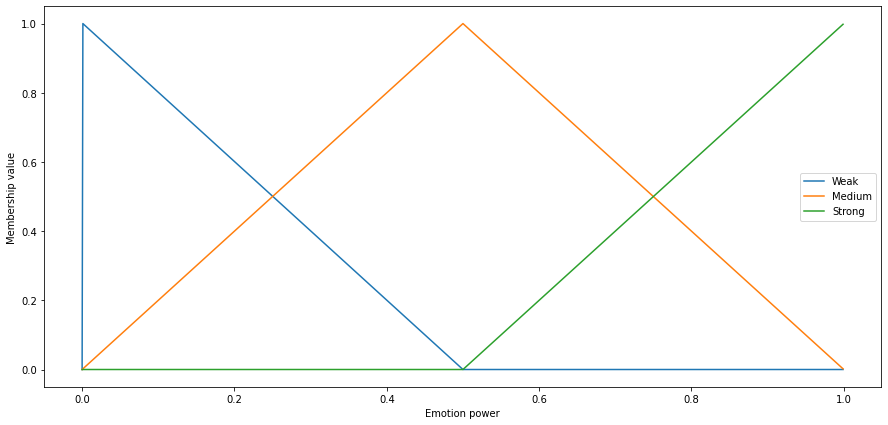

In [626]:
plt.figure(figsize=(15,7))

lines = []

for fuzzy_set in Happy.keys():
  memberships = [ triangular(x, *Happy[fuzzy_set]) for x in U ]
  # plot the chart
  tmp, = plot(U, memberships, label=fuzzy_set)
  lines.append(tmp)

legend(handles=lines)
xlabel("Emotion power")
ylabel("Membership value")

# Load dataset

In [612]:
import pandas as pd

import re
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud,STOPWORDS
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
df = pd.read_pickle("vegan_tweets2010-2022_monthly.pkl")
df.describe()

,Tweet Id,replyCount,retweetCount,likeCount,quoteCount
count,1.136770e+05,113677.000000,113677.000000,113677.000000,113677.000000
mean,7.396452e+17,0.328853,0.528603,3.144655,0.048154
std,4.674333e+17,3.921993,23.023366,344.353841,4.196721
min,7.313936e+09,0.000000,0.000000,0.000000,0.000000
25%,3.290187e+17,0.000000,0.000000,0.000000,0.000000
50%,7.483031e+17,0.000000,0.000000,0.000000,0.000000
75%,1.145107e+18,0.000000,0.000000,1.000000,0.000000
max,1.527700e+18,1119.000000,7492.000000,115499.000000,1398.000000


In [274]:
df.head()

,Datetime,Tweet Id,Text,Username,Query,replyCount,retweetCount,likeCount,quoteCount,lang,source,retweetedTweet,quotedTweet,mentionedUsers,year
0,2010-01-30 23:59:47+00:00,8430272628,@Twinz2 Well help me understand how that relat...,IQXS,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/Twinz2],2010
1,2010-01-30 23:58:21+00:00,8430226196,"okay, maybe i'm not making vegan alfredo saude...",desdemona,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010
2,2010-01-30 23:57:14+00:00,8430191199,Via @feelgoodguru: no oil #vegan pesto ~ easy-...,itsallgood3sm,vegan,0,0,0,0,en,"<a href=""http://www.cloudhopper.com/"" rel=""nof...",None,None,[https://twitter.com/feelgoodguru],2010
3,2010-01-30 23:56:25+00:00,8430165062,Just had a delicious vegan meal @ Jean's Kitch...,RachelLagroix,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010
4,2010-01-30 23:56:19+00:00,8430161604,@SecretKGB says: I like how this BBQ sauce is ...,annesmash,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/secretKGB],2010


In [627]:
import re
Tweet = df['Text'][0]

In [628]:
re.sub('@[^\s]+','',Tweet)

" Well help me understand how that relates to being Vegan...I'm serious here."

In [633]:
#remove usernames 
df['Text'] = [re.sub(r'@\w+', '', x) for x in df['Text']]

In [634]:
df.head()

,Datetime,Tweet Id,Text,Username,Query,replyCount,retweetCount,likeCount,quoteCount,lang,source,retweetedTweet,quotedTweet,mentionedUsers,year,clean
0,2010-01-30 23:59:47+00:00,8430272628,Well help me understand how that relates to b...,IQXS,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/Twinz2],2010,Well help me understand how that relates to b...
1,2010-01-30 23:58:21+00:00,8430226196,"okay, maybe i'm not making vegan alfredo saude...",desdemona,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010,"okay, maybe i'm not making vegan alfredo saude..."
2,2010-01-30 23:57:14+00:00,8430191199,Via no oil #vegan pesto ~ easy-shmeasy http:/...,itsallgood3sm,vegan,0,0,0,0,en,"<a href=""http://www.cloudhopper.com/"" rel=""nof...",None,None,[https://twitter.com/feelgoodguru],2010,Via no oil #vegan pesto ~ easy-shmeasy http:/...
3,2010-01-30 23:56:25+00:00,8430165062,Just had a delicious vegan meal @ Jean's Kitch...,RachelLagroix,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,2010,Just had a delicious vegan meal @ Jean's Kitch...
4,2010-01-30 23:56:19+00:00,8430161604,says: I like how this BBQ sauce is vegan. Wha...,annesmash,vegan,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,[https://twitter.com/secretKGB],2010,says: I like how this BBQ sauce is vegan. Wha...


# Dataset Analysis

## test

In [638]:
count = {'Happy': {'Weak': 0, 'Medium': 0, 'Strong': 0},
          'Angry': {'Weak': 0, 'Medium': 0, 'Strong': 0},
        'Surprise':{'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Sad': {'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Fear':{'Weak': 0, 'Medium': 0, 'Strong': 0}
        }

#Look at emotions in first 500 tweets, for testing 
# all tweets - for tweet in df['Text']:
for i in range(500):
    em = get_labels(df['Text'][i])
    #returns happy null, angry weak, sad strong, ...
    for emotion in em.keys():
        if em[emotion]=='null':
            continue
        count[emotion][em[emotion]] += 1
                

print(count)                 

{'Happy': {'Weak': 26, 'Medium': 68, 'Strong': 22}, 'Angry': {'Weak': 19, 'Medium': 23, 'Strong': 17}, 'Surprise': {'Weak': 39, 'Medium': 93, 'Strong': 20}, 'Sad': {'Weak': 31, 'Medium': 121, 'Strong': 40}, 'Fear': {'Weak': 29, 'Medium': 174, 'Strong': 99}}


## Querying Emotions

In [640]:
# query for particular emotions, e.g. Angry Strong or Angry Medium. 
count2 = {'Happy': {'Weak': 0, 'Medium': 0, 'Strong': 0},
          'Angry': {'Weak': 0, 'Medium': 0, 'Strong': 0},
        'Surprise':{'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Sad': {'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Fear':{'Weak': 0, 'Medium': 0, 'Strong': 0}
        }

# for tweet in df['Text']:
#look at recent tweets with happy emotion of strong or medium power
for i in range(113000, len(df['Text'])):
    em = get_labels(df['Text'][i])
    
    for emotion in em.keys():
        if em[emotion]=='null':
            continue
        count2[emotion][em[emotion]] += 1
    for emotion in em.keys():
         if emotion=="Happy" and (em[emotion]=='Strong' or em[emotion]=='Medium'):
            print(i, df['Text'][i], em, te.get_emotion(df['Text'][i]) )   
            print("\n")
print(count2)  

113009 Proper jealous of this ramen  has made using our Straight to Wok Ginger &amp; Chilli cubes 😋
#Tofoo #Tofu #Plantbased https://t.co/J1QlzUm8o8 {'Happy': 'Medium', 'Angry': 'null', 'Surprise': 'null', 'Sad': 'Medium', 'Fear': 'null'} {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.0}


113010 NEW ALL-NATURAL PRE-WORKOUT 💪
- you can be confident in using!!!

BEET NATURAL O₂ is a natural plant-based pre-workout drink you can see results with and feel good about using.
🔗 https://t.co/7NgSkdLU3q https://t.co/ABefKJm9QW {'Happy': 'Medium', 'Angry': 'null', 'Surprise': 'null', 'Sad': 'null', 'Fear': 'Medium'} {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.5}


113015 A veces fat, a veces fit, pero #vegan siempre. #plantbased #vegetal https://t.co/zFSmE4OHKP {'Happy': 'Medium', 'Angry': 'null', 'Surprise': 'null', 'Sad': 'null', 'Fear': 'Medium'} {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.5}


113018  Congrats! It becomes 

# Analysis across years

In [339]:
def split_years(dt):
    dt['year'] = dt['Datetime'].dt.year
    return [dt[dt['year'] == y] for y in dt['year'].unique()]
dtf = split_years(df)

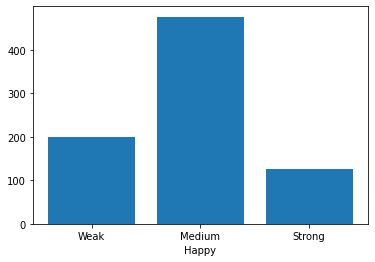

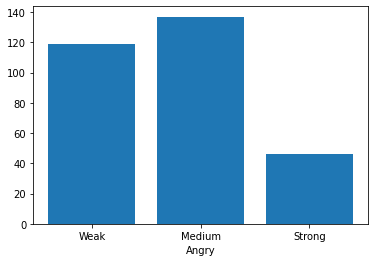

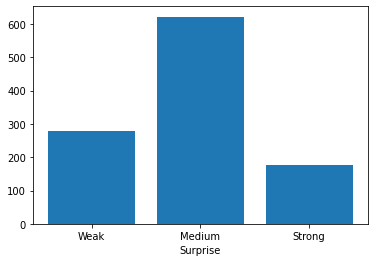

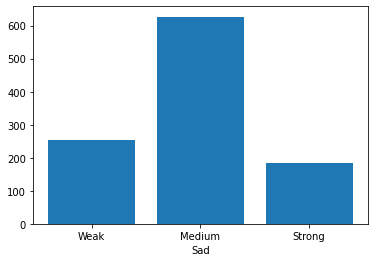

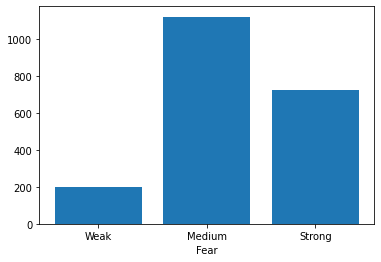

{'Happy': {'Weak': 200, 'Medium': 476, 'Strong': 125}, 'Angry': {'Weak': 119, 'Medium': 137, 'Strong': 46}, 'Surprise': {'Weak': 278, 'Medium': 622, 'Strong': 176}, 'Sad': {'Weak': 254, 'Medium': 627, 'Strong': 183}, 'Fear': {'Weak': 198, 'Medium': 1123, 'Strong': 724}}


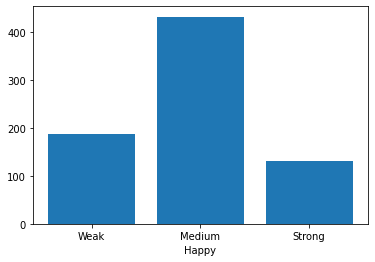

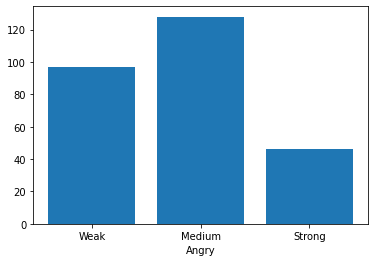

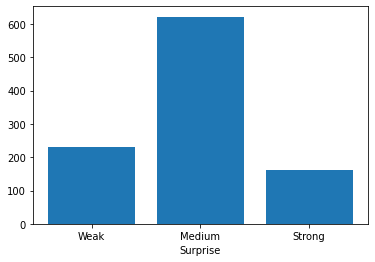

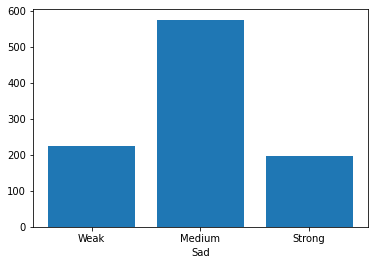

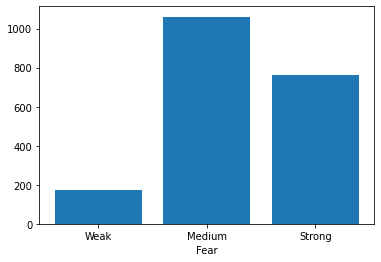

{'Happy': {'Weak': 188, 'Medium': 432, 'Strong': 132}, 'Angry': {'Weak': 97, 'Medium': 128, 'Strong': 46}, 'Surprise': {'Weak': 232, 'Medium': 622, 'Strong': 163}, 'Sad': {'Weak': 224, 'Medium': 576, 'Strong': 197}, 'Fear': {'Weak': 172, 'Medium': 1061, 'Strong': 764}}


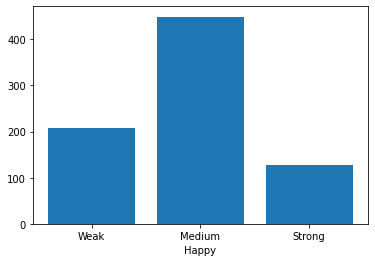

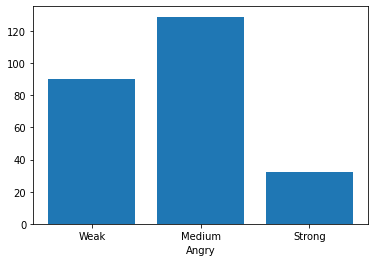

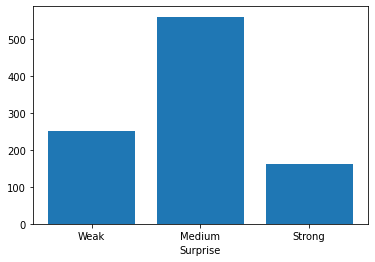

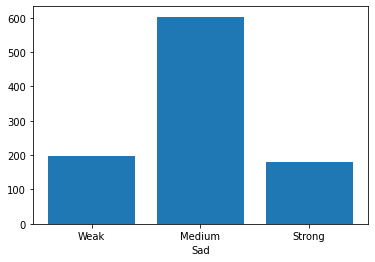

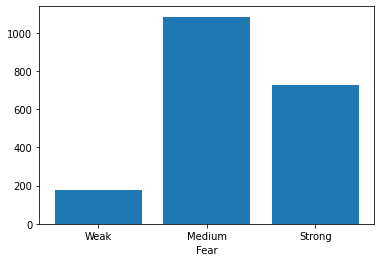

{'Happy': {'Weak': 207, 'Medium': 449, 'Strong': 127}, 'Angry': {'Weak': 90, 'Medium': 129, 'Strong': 32}, 'Surprise': {'Weak': 251, 'Medium': 561, 'Strong': 161}, 'Sad': {'Weak': 198, 'Medium': 603, 'Strong': 181}, 'Fear': {'Weak': 176, 'Medium': 1084, 'Strong': 726}}


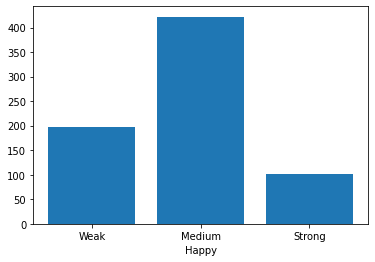

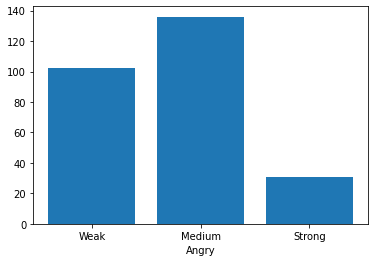

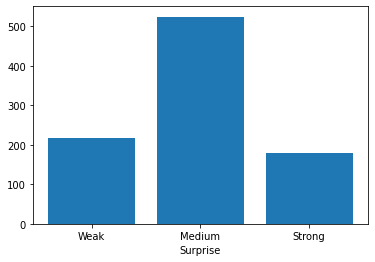

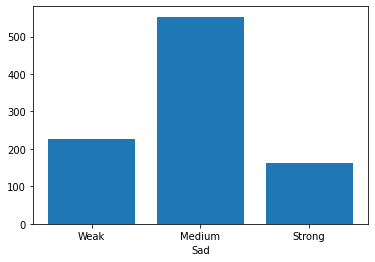

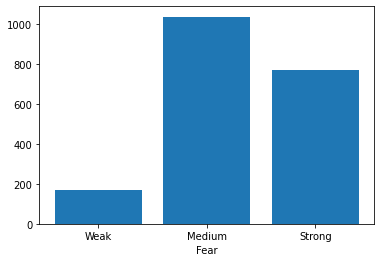

{'Happy': {'Weak': 197, 'Medium': 422, 'Strong': 101}, 'Angry': {'Weak': 102, 'Medium': 136, 'Strong': 31}, 'Surprise': {'Weak': 217, 'Medium': 524, 'Strong': 178}, 'Sad': {'Weak': 226, 'Medium': 553, 'Strong': 163}, 'Fear': {'Weak': 170, 'Medium': 1039, 'Strong': 774}}


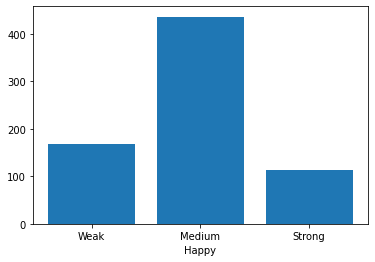

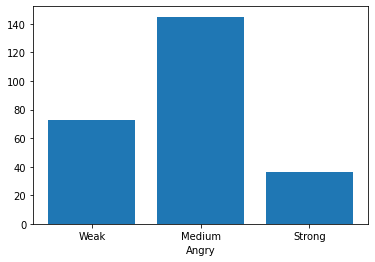

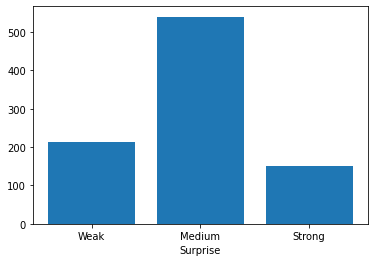

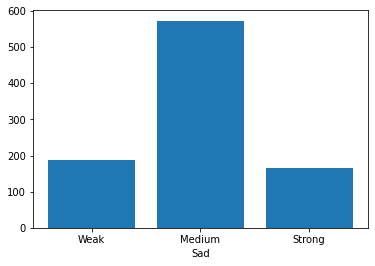

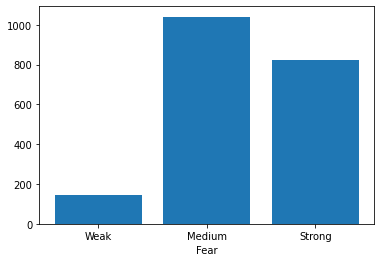

{'Happy': {'Weak': 169, 'Medium': 436, 'Strong': 114}, 'Angry': {'Weak': 73, 'Medium': 145, 'Strong': 36}, 'Surprise': {'Weak': 212, 'Medium': 540, 'Strong': 151}, 'Sad': {'Weak': 188, 'Medium': 573, 'Strong': 166}, 'Fear': {'Weak': 145, 'Medium': 1040, 'Strong': 823}}


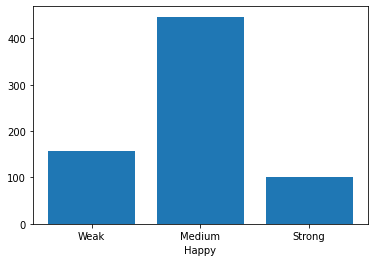

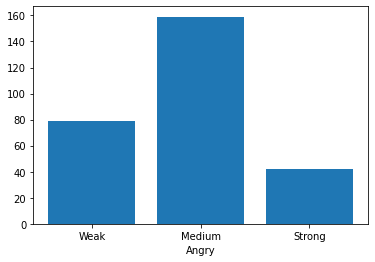

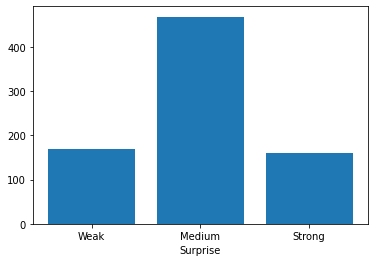

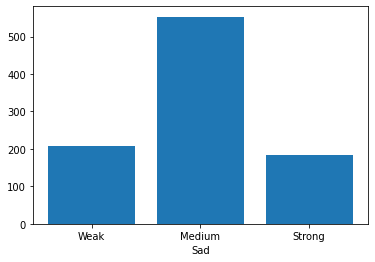

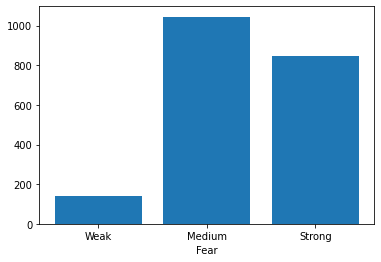

{'Happy': {'Weak': 158, 'Medium': 447, 'Strong': 101}, 'Angry': {'Weak': 79, 'Medium': 159, 'Strong': 42}, 'Surprise': {'Weak': 168, 'Medium': 468, 'Strong': 161}, 'Sad': {'Weak': 209, 'Medium': 553, 'Strong': 183}, 'Fear': {'Weak': 139, 'Medium': 1045, 'Strong': 845}}


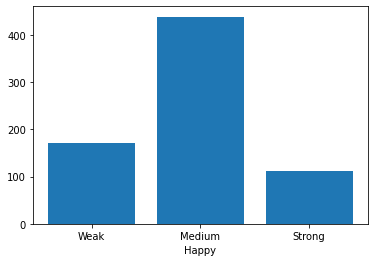

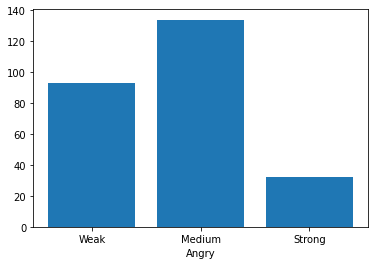

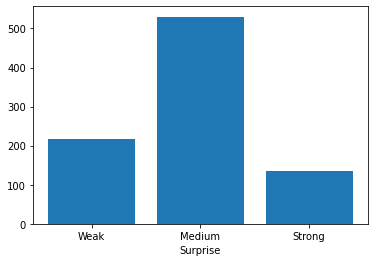

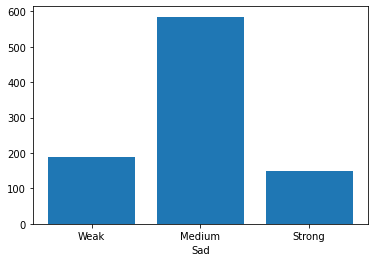

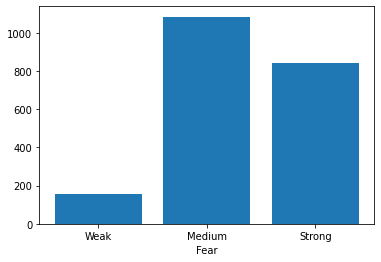

{'Happy': {'Weak': 171, 'Medium': 439, 'Strong': 111}, 'Angry': {'Weak': 93, 'Medium': 134, 'Strong': 32}, 'Surprise': {'Weak': 217, 'Medium': 530, 'Strong': 134}, 'Sad': {'Weak': 188, 'Medium': 585, 'Strong': 149}, 'Fear': {'Weak': 156, 'Medium': 1085, 'Strong': 841}}


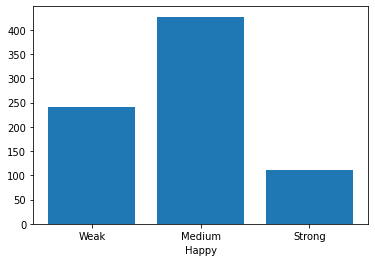

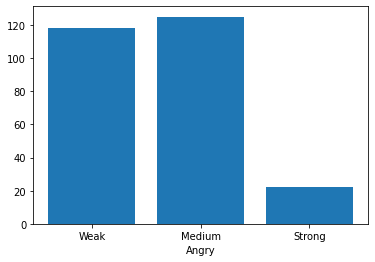

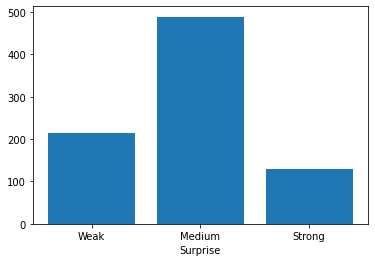

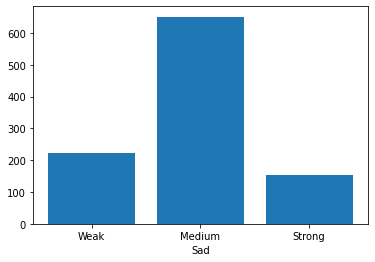

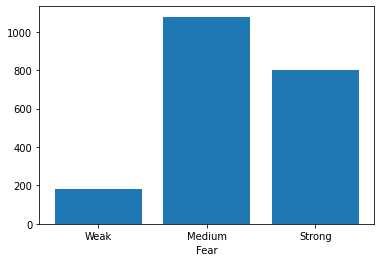

{'Happy': {'Weak': 241, 'Medium': 427, 'Strong': 111}, 'Angry': {'Weak': 118, 'Medium': 125, 'Strong': 22}, 'Surprise': {'Weak': 215, 'Medium': 489, 'Strong': 130}, 'Sad': {'Weak': 223, 'Medium': 651, 'Strong': 153}, 'Fear': {'Weak': 179, 'Medium': 1079, 'Strong': 799}}


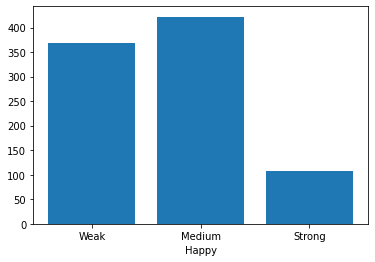

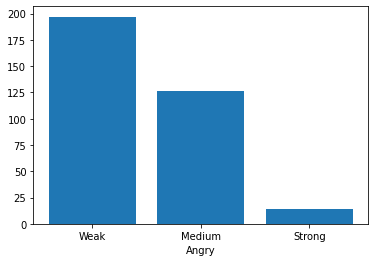

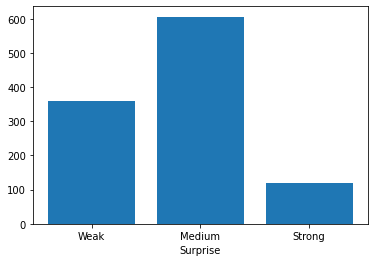

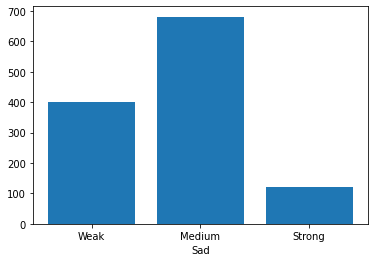

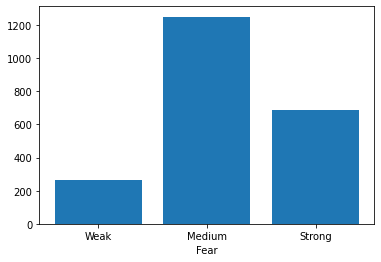

{'Happy': {'Weak': 369, 'Medium': 422, 'Strong': 108}, 'Angry': {'Weak': 197, 'Medium': 126, 'Strong': 14}, 'Surprise': {'Weak': 359, 'Medium': 606, 'Strong': 120}, 'Sad': {'Weak': 399, 'Medium': 681, 'Strong': 120}, 'Fear': {'Weak': 265, 'Medium': 1250, 'Strong': 685}}


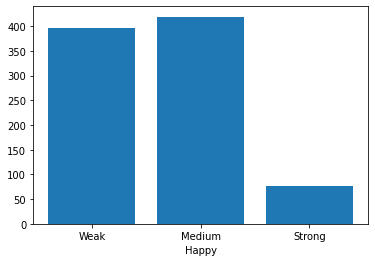

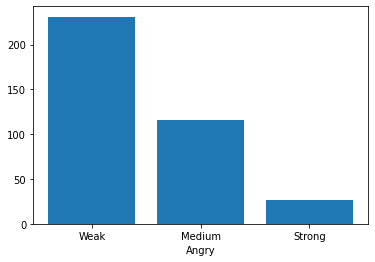

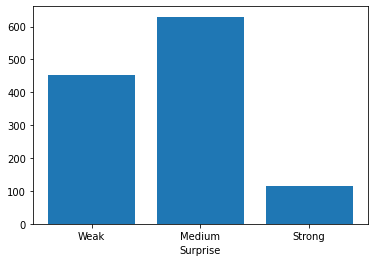

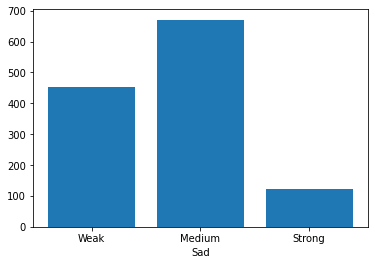

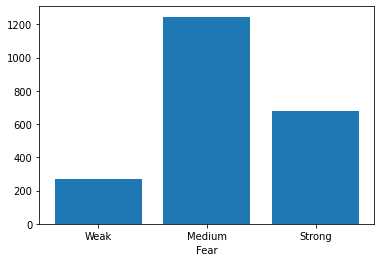

{'Happy': {'Weak': 396, 'Medium': 419, 'Strong': 76}, 'Angry': {'Weak': 231, 'Medium': 116, 'Strong': 26}, 'Surprise': {'Weak': 454, 'Medium': 630, 'Strong': 115}, 'Sad': {'Weak': 452, 'Medium': 671, 'Strong': 121}, 'Fear': {'Weak': 270, 'Medium': 1246, 'Strong': 680}}


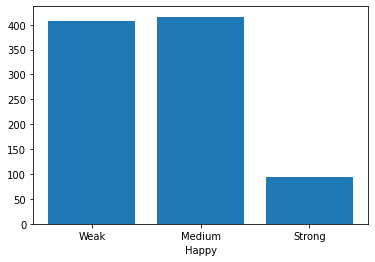

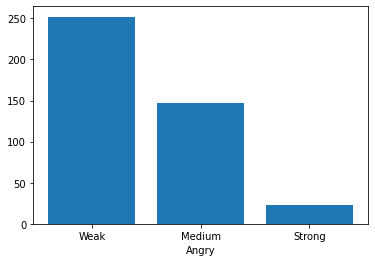

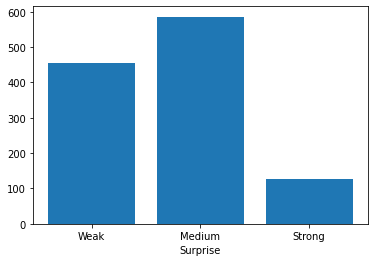

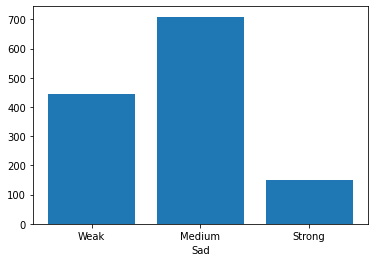

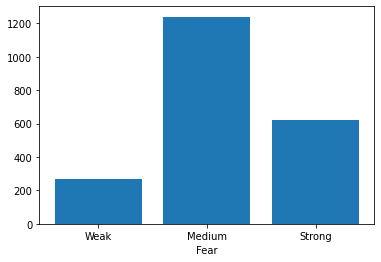

{'Happy': {'Weak': 408, 'Medium': 416, 'Strong': 95}, 'Angry': {'Weak': 252, 'Medium': 147, 'Strong': 23}, 'Surprise': {'Weak': 456, 'Medium': 586, 'Strong': 126}, 'Sad': {'Weak': 445, 'Medium': 709, 'Strong': 151}, 'Fear': {'Weak': 271, 'Medium': 1240, 'Strong': 622}}


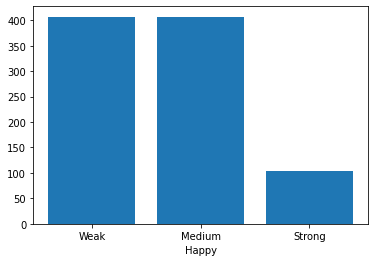

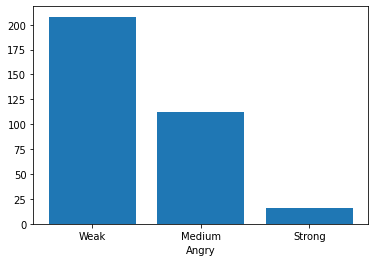

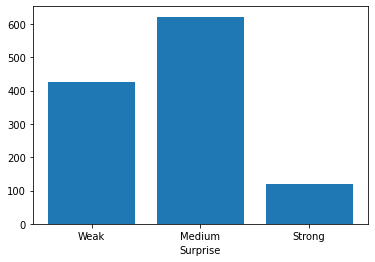

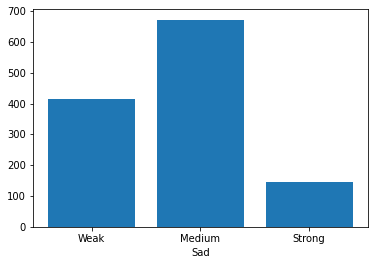

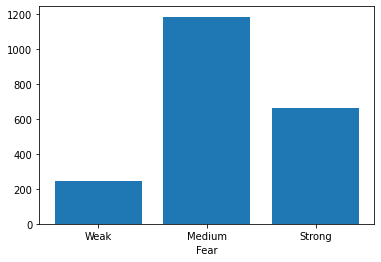

{'Happy': {'Weak': 407, 'Medium': 406, 'Strong': 103}, 'Angry': {'Weak': 208, 'Medium': 112, 'Strong': 16}, 'Surprise': {'Weak': 426, 'Medium': 622, 'Strong': 121}, 'Sad': {'Weak': 416, 'Medium': 672, 'Strong': 145}, 'Fear': {'Weak': 246, 'Medium': 1187, 'Strong': 666}}


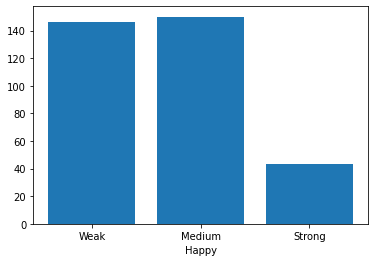

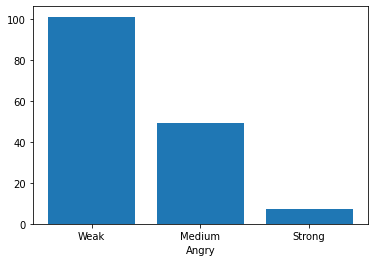

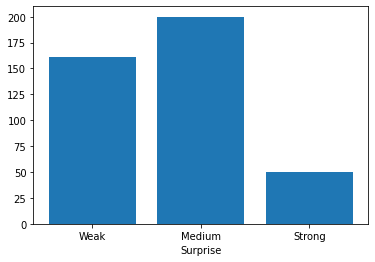

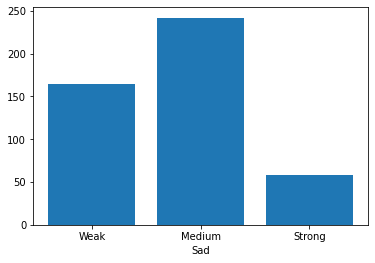

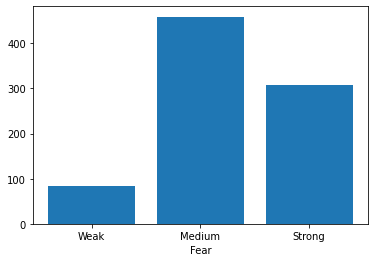

{'Happy': {'Weak': 146, 'Medium': 150, 'Strong': 43}, 'Angry': {'Weak': 101, 'Medium': 49, 'Strong': 7}, 'Surprise': {'Weak': 161, 'Medium': 200, 'Strong': 50}, 'Sad': {'Weak': 165, 'Medium': 242, 'Strong': 58}, 'Fear': {'Weak': 84, 'Medium': 459, 'Strong': 308}}


In [518]:
#Analysis across years
cnt = 0
for i in range(len(dtf)):
    plt.clf()
    count3 = {'Happy': {'Weak': 0, 'Medium': 0, 'Strong': 0},
             'Angry': {'Weak': 0, 'Medium': 0, 'Strong': 0},
             'Surprise':{'Weak': 0, 'Medium': 0, 'Strong': 0},
             'Sad': {'Weak': 0, 'Medium': 0, 'Strong': 0},
             'Fear':{'Weak': 0, 'Medium': 0, 'Strong': 0}
              }
    for j in range(len(dtf[i])):
        if dtf[i]['Query'][cnt] == 'vegan' or dtf[i]['Query'][cnt] == 'vegetarian' or dtf[i]['Query'][cnt] == 'tofu':
            em = get_labels(str(dtf[i]['Text'][cnt]))
            for emotion in em.keys():
                if em[emotion]=='null':
                    continue
                count3[emotion][em[emotion]] += 1
        cnt += 1
    for k in count3.keys():
        year = dtf[i]['Datetime'].apply(lambda x: x.year)
        names = list(count3[k].keys())
        values = list(count3[k].values())
        plt.bar(range(len(count3[k])), values, tick_label=names)
        xlabel(k)
        plt.show()
    print(count3)
# print(dtf[1]['Text'])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


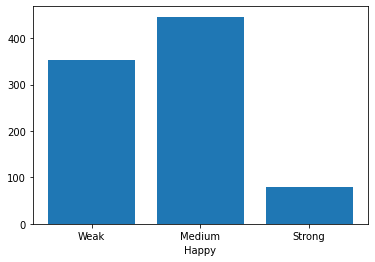

{'Happy': {'Weak': 352, 'Medium': 446, 'Strong': 79}, 'Angry': {'Weak': 213, 'Medium': 103, 'Strong': 19}, 'Surprise': {'Weak': 370, 'Medium': 395, 'Strong': 81}, 'Sad': {'Weak': 378, 'Medium': 647, 'Strong': 143}, 'Fear': {'Weak': 251, 'Medium': 882, 'Strong': 477}}


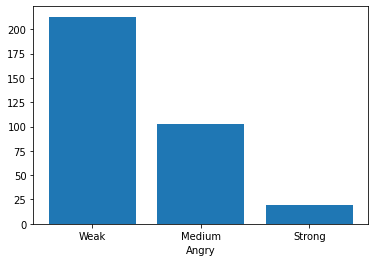

{'Happy': {'Weak': 352, 'Medium': 446, 'Strong': 79}, 'Angry': {'Weak': 213, 'Medium': 103, 'Strong': 19}, 'Surprise': {'Weak': 370, 'Medium': 395, 'Strong': 81}, 'Sad': {'Weak': 378, 'Medium': 647, 'Strong': 143}, 'Fear': {'Weak': 251, 'Medium': 882, 'Strong': 477}}


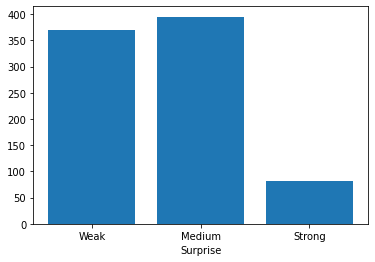

{'Happy': {'Weak': 352, 'Medium': 446, 'Strong': 79}, 'Angry': {'Weak': 213, 'Medium': 103, 'Strong': 19}, 'Surprise': {'Weak': 370, 'Medium': 395, 'Strong': 81}, 'Sad': {'Weak': 378, 'Medium': 647, 'Strong': 143}, 'Fear': {'Weak': 251, 'Medium': 882, 'Strong': 477}}


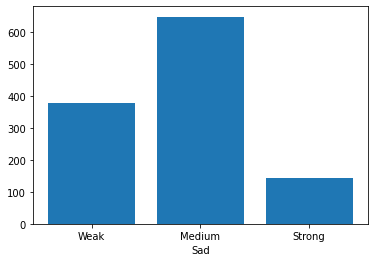

{'Happy': {'Weak': 352, 'Medium': 446, 'Strong': 79}, 'Angry': {'Weak': 213, 'Medium': 103, 'Strong': 19}, 'Surprise': {'Weak': 370, 'Medium': 395, 'Strong': 81}, 'Sad': {'Weak': 378, 'Medium': 647, 'Strong': 143}, 'Fear': {'Weak': 251, 'Medium': 882, 'Strong': 477}}


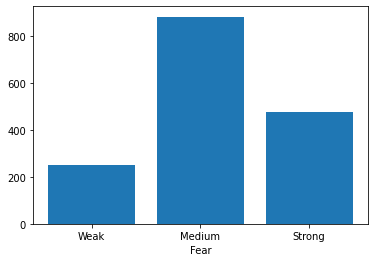

{'Happy': {'Weak': 352, 'Medium': 446, 'Strong': 79}, 'Angry': {'Weak': 213, 'Medium': 103, 'Strong': 19}, 'Surprise': {'Weak': 370, 'Medium': 395, 'Strong': 81}, 'Sad': {'Weak': 378, 'Medium': 647, 'Strong': 143}, 'Fear': {'Weak': 251, 'Medium': 882, 'Strong': 477}}


In [521]:
#2022
cnt = 109677
i = len(dtf) - 1
plt.clf()
cnt2 = 0
count3 = {'Happy': {'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Angry': {'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Surprise':{'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Sad': {'Weak': 0, 'Medium': 0, 'Strong': 0},
         'Fear':{'Weak': 0, 'Medium': 0, 'Strong': 0}
          }
for j in range(len(dtf[i])):
    if cnt2 == 3600:
        break
    if dtf[i]['Query'][cnt] == 'vegan' or dtf[i]['Query'][cnt] == 'vegetarian' or dtf[i]['Query'][cnt] == 'tofu' or dtf[i]['Query'][cnt] == 'plant based' or dtf[i]['Query'][cnt] == 'cruelty-free' or dtf[i]['Query'][cnt] == 'veggie':
        em = get_labels(str(dtf[i]['Text'][cnt]))
        for emotion in em.keys():
            if em[emotion]=='null':
                continue
            count3[emotion][em[emotion]] += 1
    cnt += 1
    cnt2 += 1
    if cnt2 % 100 == 0: print(cnt2)
for k in count3.keys():
    year = dtf[i]['Datetime'].apply(lambda x: x.year)
    names = list(count3[k].keys())
    values = list(count3[k].values())
    plt.bar(range(len(count3[k])), values, tick_label=names)
    xlabel(k)
    plt.show()
    print(count3)